# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, _y_, given real and/or categorical input ("feature") data, _X_. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the `scikit-learn` (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1]:
import numpy as np
import pandas as pd

file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name']
df_iris = pd.read_csv(file_url, names=col_names, header=None)

X = df_iris.iloc[:, :2]  # features
y = df_iris.iloc[:, -1]  # class

We can print some of the feature and the class values.

In [2]:
print(X.head())
print()
print(y.head())

   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


All `sklearn` classification algorithms require that the class values be represented as numbers. We can use the `LabelEncoder` function to convert the string class labels to corresponding integers.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Now let's apply some classification methods to the data.

## _k_-Nearest Neighbors

One of the simplest classification algorithms is the _k_-nearest neighbors algorithm. Let's import it from `sklearn`. We can call the method with several available inputs. Here, we specify the number of neighbors _k_ to consider.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)

Every classifier in `sklearn` has a `fit()` method. For a supervised learning algorithm, which learns to map features _X_ to classes _y_, we must input the corresponding _X_ and _y_ data.

In [5]:
clf_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

We call an algorithm that has been fit (or parameterized) to input data a "model." Can now use the fitted model to predict the class _y_ given new features _X_.

Here, we'll simply see how well the classifier can predict the data on which it was fit. We can predict on feature data using the fitted model's `predict()` method, the output of which are corresponding class predictions:

In [6]:
y_pred = clf_knn.predict(X)
clf_knn.kneighbors(X);

We can compare the actual values, `y`, to the predicted values, `y_pred`. Here we compute the fraction of times that they match:

In [7]:
print(np.average(y == y_pred))

0.8533333333333334


Let's try visualizing the results. We can use another Python package, `matplotlib`, to generate these visualizations.

In [8]:
% matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Let's first define the color scheme.

In [9]:
# Create color maps.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Now, let's create a meshgrid of matrix of feature values. For each feature, we'll create a list of evenly spaced values. With two features, this will produce a grid of points. We can calculate the predicted class values for each point in this grid to create a plot with colored decision boundaries.

In [10]:
# Create a mesh of shape [x_min, m_max]x[y_min, y_max].
h = .05  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Now let's get the class predictions and create the plot.

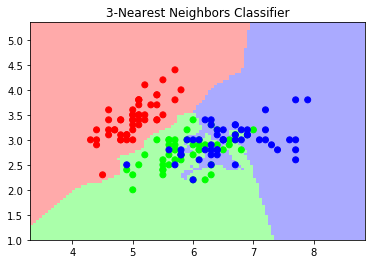

In [11]:
# Predict a class value for each point in the mesh.
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Use the predictions to create a color plot.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Nearest Neighbors Classifier");

## Logistic Regression

Let's try viewing the results from a logistic regression classifier.

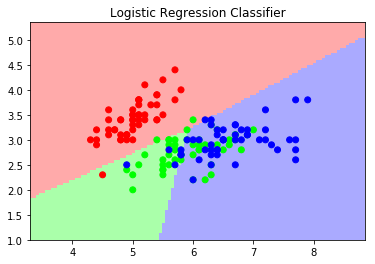

In [12]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X, y)

# Predict a class value for each point in the mesh.
Z = clf_lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Use the predictions to create a color plot.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression Classifier");

## Perceptron

Let's try fitting an visualizing another classifier, the Perceptron.

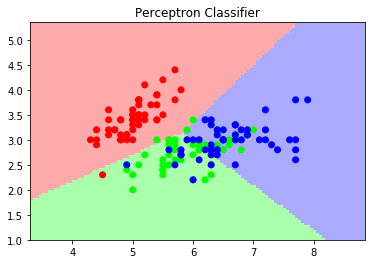

In [13]:
from sklearn.linear_model import Perceptron

clf_per = Perceptron(max_iter=1000)
clf_per.fit(X, y)

# Predict a class value for each point in the mesh.
Z = clf_per.predict(np.c_[xx.ravel(), yy.ravel()])

# Use the predictions to create a color plot.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Perceptron Classifier");

Now, when building a model, we're typically interested in performance on data we haven't yet seen. A simple model that simply memorizes the training data may perform well on the data we've seen but poorly on unseen data. Unless we can evaluate a model on unseen data, we don't know how accurate its predictions may be.

To address this issue, we can separate the data into training and testing sets. We can fit the model on the training data and then evaluate it on the separate testing data. `sklearn` provides a convenient function to do this. Let's save 20% of our data for testing, and use the rest for fitting our models.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_knn.fit(X_train, y_train)
clf_per.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
y_pred_per = clf_per.predict(X_test)

print(np.average(y_test == y_pred_knn))
print(np.average(y_test == y_pred_per))

0.7666666666666667
0.7333333333333333


Let's try viewing the online results of the perceptron classifier. As an iterative classifier, we can use `matplotlib`'s animation functions to view how the algorithm learns over the course of many iterations. *Note that FFmpeg is required.*

<IPython.core.display.Javascript object>


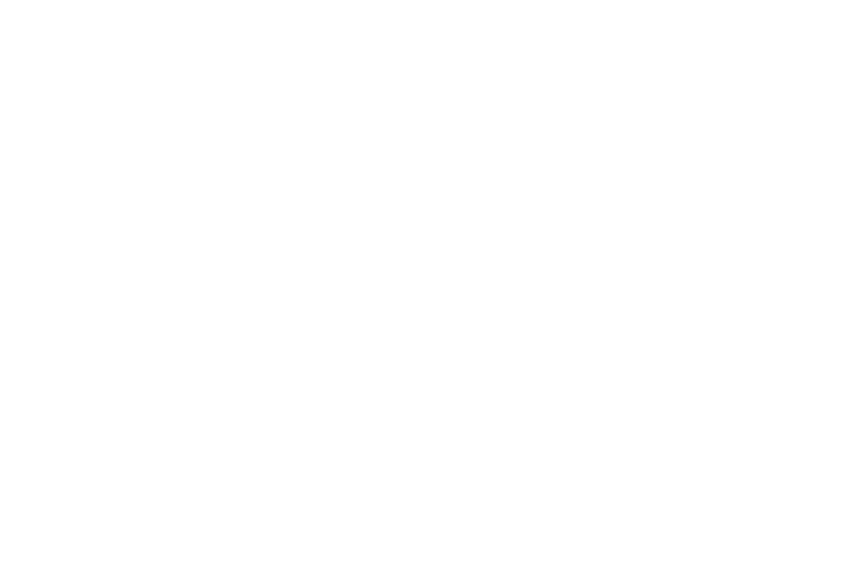

<IPython.core.display.Javascript object>


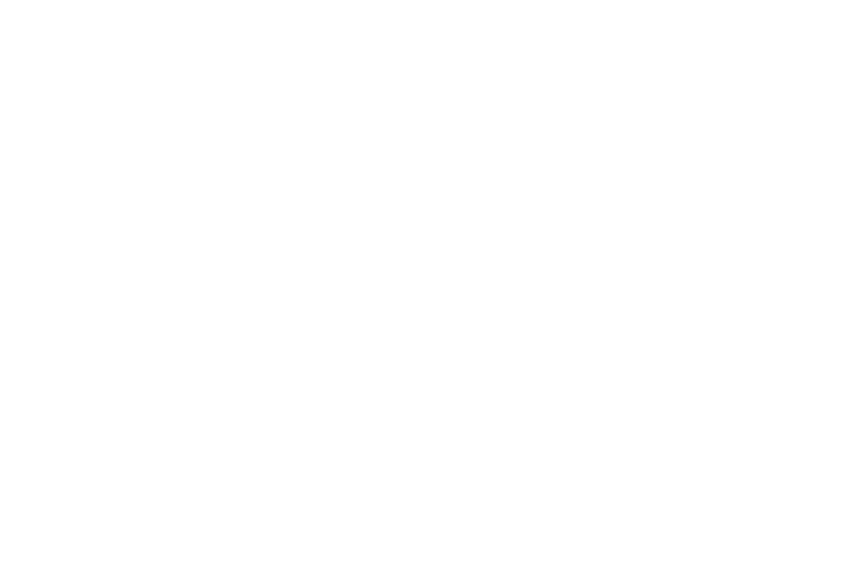

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc

# Set up the figure, the axis, and plot elements.
fig, ax = plt.subplots()
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Perceptron Classifier")

def init():
    """Initialization function."""
    clf_per.partial_fit(X, y)

def animate(i):
    """Animation function. This is called sequentially."""
    clf_per.partial_fit(X, y)

    Z = clf_per.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points.
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)

    return ax

# Call the animator.
anim = animation.FuncAnimation(fig, func=animate, frames=25, init_func=init)

HTML(anim.to_html5_video());  # requires ffmpeg to be installed

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa. We'll try to predict whether the house price is "high" or "low".

In [16]:
df = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

### 1. Drop or fill missing values. Consider how to handle the following columns, which have many missing values: `Alley`, `Fence`, `Fireplace Qu`, `Misc Feature`, `Pool QC`.

In [17]:
df = df.drop(['Alley', 'Fence', 'Fireplace Qu', 'Misc Feature', 'Pool QC'], 1)
df = df.dropna()

### 2. Separate the features and the class. Here, our class is the last column `SalePrice`.

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### 3. Transform the features to dummy variables.

In [19]:
X = pd.get_dummies(X)

### 4. Bin the SalePrice into two outcomes, 'high' or 'low'. Make them roughly balanced.

In [20]:
class_names = ['Low', 'High']
y_bin = pd.qcut(df['SalePrice'], 2, labels=class_names)
print(X.shape, y_bin.shape)
print(y_bin.head(10))

(2218, 270) (2218,)
0    High
1     Low
2    High
3    High
4    High
5    High
6    High
7    High
8    High
9    High
Name: SalePrice, dtype: category
Categories (2, object): [Low < High]


### 5. Split the dataset into 80% training data and 20% testing data. Each row should consist of the features, `X`, and the binned sales price, `y`.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2)

### 6. Fit three models: a 1-nearest neighbors classifier, a 10-nearest neighbors classifier, and a 100-nearest neighbors classifier. Fit them all on the training data. Use all of the feature data to predict the class.

In [22]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=10)
clf3 = KNeighborsClassifier(n_neighbors=100)

clf1.fit(X_train, y_train);
clf2.fit(X_train, y_train);
clf3.fit(X_train, y_train);

### 6. Compare the accuracy of the _k_-nearest neighbors classifiers on the test data. 

In [23]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

print("KNN (k=1):  ", round(np.average(y_test == y_pred1), 3))
print("KNN (k=10): ", round(np.average(y_test == y_pred2), 3))
print("KNN (k=100):", round(np.average(y_test == y_pred3), 3))

KNN (k=1):   0.856
KNN (k=10):  0.885
KNN (k=100): 0.806


### 7. Now fit a perceptron classifier and logistic regression classifier on the training data. Compare the accuray of the perceptron, logistic regression, and the KNN classifiers. Which performs best?

In [24]:
clf4 = Perceptron(max_iter=1000)
clf5 = LogisticRegression()

clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)
print("Perceptron:", round(np.average(y_test == y_pred4), 3))
print("Logistic Regression:", round(np.average(y_test == y_pred5), 3))

Perceptron: 0.495
Logistic Regression: 0.586
